In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


In [ ]:
filtered_df = pd.read_csv('/content/drive/MyDrive/shortlisted.csv')


In [ ]:
filtered_df = filtered_df[filtered_df['Date'] > '2024-10-01']

filtered_df.shape


(8097, 22)

In [ ]:


#Part of the code that takes the longest to run
import requests
census_tracts = []

def get_census_tract(lat, lng):
    url = f"https://geocoding.geo.census.gov/geocoder/geographies/coordinates"
    params = {
        "x": lng,
        "y": lat,
        "benchmark": "Public_AR_Current",
        "vintage": "Current_Current",
        "layers": "Census Tracts",
        "format": "json",
    }
    response = requests.get(url, params=params)
    if response.status_code == 200:
        data = response.json()
        try:
            return data["result"]["geographies"]["Census Tracts"][0]["TRACT"]
        except (KeyError, IndexError):
            return None
    else:
        return None

for i in range(len(filtered_df)):
    lat = filtered_df.iloc[i]['Latitude']
    lng = filtered_df.iloc[i]['Longitude']
    try:
        result = get_census_tract(lat, lng)
    except Exception:
        result = None

    census_tracts.append(result)

filtered_df['Census-tracts'] = census_tracts


In [ ]:
filtered_df['Census-tracts']
filtered_df.to_csv('/content/drive/My Drive/new_crimes.csv', index=False)

In [ ]:
filtered_df = filtered_df.dropna()


In [ ]:
filtered_df.shape
filtered_df

ID Case Number                 Date                   Block  \
49054  13616489    JH451030  2024-10-01 00:00:00      054XX N HARLEM AVE   
49075  13616723    JH451613  2024-10-01 00:00:00     012XX N ASHLAND AVE   
49088  13620445    JH455939  2024-10-01 00:00:00         005XX E 94TH ST   
49105  13617301    JH452201  2024-10-01 00:00:00         006XX E 89TH PL   
49119  13616455    JH451232  2024-10-01 00:00:00    074XX S EAST END AVE   
...         ...         ...                  ...                     ...   
57479  13664702    JH509181  2024-11-14 21:00:00  057XX S SACRAMENTO AVE   
57480  13663593    JH507893  2024-11-14 16:30:00     042XX N LINCOLN AVE   
57481  13663620    JH507980  2024-11-14 17:44:00      016XX N AUSTIN AVE   
57482  13664327    JH508760  2024-11-14 10:30:00      012XX S ALBANY AVE   
57483  13664177    JH508593  2024-11-14 23:55:00  079XX S CALIFORNIA AVE   

       IUCR         Primary Type           Description  \
49054  0610             BURGLARY        FORCIBLE ENTRY   
49075  0560              ASSAULT                SIMPLE   
49088  0560              ASSAULT                SIMPLE   
49105  0610             BURGLARY        FORCIBLE ENTRY   
49119  0560              ASSAULT                SIMPLE   
...     ...                  ...                   ...   
57479  0910  MOTOR VEHICLE THEFT            AUTOMOBILE   
57480  0560              ASSAULT                SIMPLE   
57481  0560              ASSAULT                SIMPLE   
57482  051A              ASSAULT  AGGRAVATED - HANDGUN   
57483  0910  MOTOR VEHICLE THEFT            AUTOMOBILE   

           Location Description  Arrest  Domestic  ...  Community Area  \
49054        SMALL RETAIL STORE   False     False  ...            10.0   
49075               CTA STATION   False      True  ...            24.0   
49088                 APARTMENT   False      True  ...            49.0   
49105                 APARTMENT   False     False  ...            44.0   
49119  SCHOOL - PUBLIC BUILDING   False     False  ...            43.0   
...                         ...     ...       ...  ...             ...   
57479                    STREET   False     False  ...            63.0   
57480                    STREET   False     False  ...             5.0   
57481                 RESIDENCE   False      True  ...            25.0   
57482                 APARTMENT   False     False  ...            29.0   
57483                    STREET   False     False  ...            70.0   

       FBI Code  X Coordinate  Y Coordinate  Year              Updated On  \
49054        05     1127365.0     1935728.0  2024  10/08/2024 03:41:23 PM   
49075       08A     1165506.0     1908134.0  2024  10/08/2024 03:41:23 PM   
49088       08A     1181372.0     1842759.0  2024  10/08/2024 03:41:23 PM   
49105        05     1182031.0     1845774.0  2024  10/08/2024 03:41:23 PM   
49119       08A     1188823.0     1856085.0  2024  10/08/2024 03:41:23 PM   
...         ...           ...           ...   ...                     ...   
57479        07     1157356.0     1866527.0  2024  11/22/2024 03:41:36 PM   
57480       08A     1161360.0     1928326.0  2024  11/22/2024 03:41:36 PM   
57481       08A     1136158.0     1910311.0  2024  11/22/2024 03:41:36 PM   
57482       04A     1155906.0     1894238.0  2024  11/22/2024 03:41:36 PM   
57483        07     1159092.0     1851798.0  2024  11/22/2024 03:41:36 PM   

        Latitude  Longitude                       Location  Census-tracts  
49054  41.979963 -87.806979  (41.979962633, -87.806978658)         100600  
49075  41.903514 -87.667498   (41.90351448, -87.667498444)         241600  
49088  41.723768 -87.611238  (41.723767615, -87.611237607)         490200  
49105  41.732026 -87.608731  (41.732025939, -87.608730784)         440900  
49119  41.760161 -87.583520  (41.760160698, -87.583520062)         430900  
...          ...        ...                            ...            ...  
57479  41.789510 -87.698565  (41.789509861, -87.698564888

In [ ]:
!pip install folium

In [ ]:
import folium



geojson_path = "/content/Boundaries - Census Tracts - 2010.geojson"

chicago_map = folium.Map(location=[41.8781, -87.6298], zoom_start=12)

#  census tract boundaries
folium.GeoJson(
    geojson_path,
    name="Census Tracts",
    style_function=lambda x: {
        "fillColor": "none",
        "color": "black",
        "weight": 1,
        "opacity": 0.7,
    },
).add_to(chicago_map)

for _, row in filtered_df.iterrows():
    folium.Marker(
        location=[row["Latitude"], row["Longitude"]],
        popup=f"Crime: {row['Primary Type']}",
        icon=folium.Icon(color="red", icon="info-sign")
    ).add_to(chicago_map)

folium.LayerControl().add_to(chicago_map)

chicago_map.save("chicago_census_tract_map.html")
chicago_map


In [ ]:
# Part 2 - finding score
# Get the frequency of crimes happening in each census tract
# Example - 20 robberies happened in Cicero, 25 assault happened in Cicero

# Principle Component Analysis (PCA)
# Separate Census Tract into separate dataframes


In [ ]:
grouped = filtered_df.groupby('Census-tracts')
tract_dfs = {tract: data for tract, data in grouped}

tract_dfs

{'010100':              ID Case Number                 Date                  Block  IUCR  \
 49748  13620862    JH456364  2024-10-04 22:00:00    076XX N SHERIDAN RD  0620   
 50590  13625216    JH461650  2024-10-08 00:30:00     076XX N PAULINA ST  0530   
 51418  13629107    JH465375  2024-10-12 06:16:00    077XX N ASHLAND AVE  051A   
 52279  13634512    JH472770  2024-10-17 17:00:00  077XX N HERMITAGE AVE  0910   
 52485  13635185    JH473743  2024-10-18 20:44:00    077XX N SHERIDAN RD  0560   
 53318  13641675    JH481469  2024-10-23 16:00:00     077XX N PAULINA ST  0560   
 54009  13644432    JH484993  2024-10-27 08:30:00    016XX W JONQUIL TER  0560   
 54124  13644249    JH484457  2024-10-27 08:14:00    016XX W JONQUIL TER  0560   
 54559  13647702    JH488629  2024-10-30 10:54:00    016XX W JONQUIL TER  0560   
 55117  13650329    JH491748  2024-11-01 15:12:00    016XX W JONQUIL TER  051A   
 55347  13652053    JH494052  2024-11-03 01:15:00    016XX W JUNEWAY TER  0920   
 
    

In [ ]:
len(tract_dfs)

800

In [ ]:
tract_dfs

{'020601':               ID Case Number                Date              Block  IUCR  \
 425108  13665046    JH508379 2024-11-14 11:30:00  064XX N MOZART ST  051A   
 
        Primary Type           Description Location Description  Arrest  \
 425108      ASSAULT  AGGRAVATED - HANDGUN             SIDEWALK   False   
 
         Domestic  ...  Community Area  FBI Code  X Coordinate  Y Coordinate  \
 425108     False  ...             2.0       04A     1156164.0     1942494.0   
 
           Year              Updated On   Latitude  Longitude  \
 425108  2024.0  11/22/2024 03:41:36 PM  41.997994 -87.700882   
 
                             Location  Census-tracts  
 425108  (41.997994387, -87.70088238)         020601  
 
 [1 rows x 23 columns],
 '020901':               ID Case Number                Date              Block  IUCR  \
 424849  13665937    JH508316 2024-11-14 23:20:00  062XX N HOYNE AVE  0560   
 
        Primary Type Description Location Description  Arrest  Domestic  ...  \
 4

In [ ]:
crimes_to_display = ['ROBBERY', 'HOMICIDE', 'CRIMINAL SEXUAL ASSAULT',  'BURGLARY', 'MOTOR VEHICLE THEFT', 'ASSAULT']

In [ ]:
import math

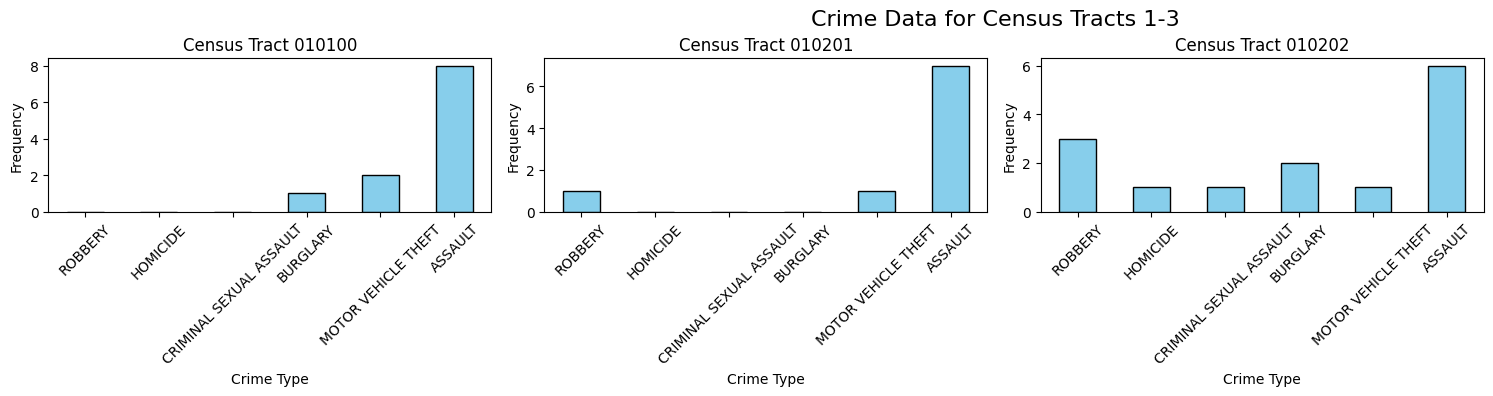

In [ ]:
#With crimes_to_display I reindex the x-axis to include all crime types even if it has a 0 frequency, though I haven't ran and tested this code yet

def plot_tract_chunk(tract_dfs, start, end, columns=4):
    tract_chunk = dict(list(tract_dfs.items())[start-1:end])
    num_tracts = len(tract_chunk)

    rows = math.ceil(num_tracts / columns)

    fig, axes = plt.subplots(rows, columns, figsize=(columns * 5, rows * 4))
    axes = axes.flatten()

    for i, (tract, tract_df) in enumerate(tract_chunk.items()):
        crime_counts = tract_df['Primary Type'].value_counts()
        crime_counts = crime_counts.reindex(crimes_to_display, fill_value=0)


        ax = axes[i]
        crime_counts.plot(kind='bar', ax=ax, color='skyblue', edgecolor='black')

        ax.set_title(f'Census Tract {tract}', fontsize=12)
        ax.set_xlabel('Crime Type', fontsize=10)
        ax.set_ylabel('Frequency', fontsize=10)
        ax.tick_params(axis='x', rotation=45)

    for j in range(i + 1, rows * columns):
        fig.delaxes(axes[j])

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    fig.suptitle(f'Crime Data for Census Tracts {start}-{end}', fontsize=16, y=0.98)


    plt.show()

plot_tract_chunk(tract_dfs, start=1, end=3)

In [ ]:
#PCA Analysis

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler

crime_counts = filtered_df.groupby(['Census-tracts', 'Primary Type']).size().unstack(fill_value=0)

scaler = StandardScaler()
crime_counts_scaled = scaler.fit_transform(crime_counts)

pca = PCA(n_components=1)
principal_components = pca.fit_transform(crime_counts_scaled)

min_max_scaler = MinMaxScaler(feature_range=(1, 100))
scaled_component = min_max_scaler.fit_transform(principal_components)



df_result = pd.DataFrame(data=scaled_component, index=crime_counts.index, columns=['combined_crime_value'])

df_result.head()

combined_crime_value
Census-tracts                      
010100                    11.437568
010201                     9.448538
010202                    22.864080
010300                     8.147372
010400                    12.402411

In [ ]:
df_result['combined_crime_value'].max()


100.0

In [ ]:
df_result['combined_crime_value'].min()

1.0

In [ ]:
df_result.to_csv('/content/drive/My Drive/pca_vals.csv', index=False)